In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import warnings
warnings.filterwarnings("ignore")

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
train_set = torchvision.datasets.FashionMNIST(#导包
    './data/FashionMNIST',#数据的路径
    train = True,#我们希望数据为训练数据
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])#把数据变成张量
)
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 10
)

100.0%


Extracting ./data/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



100.0%


Extracting ./data/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



100.0%


Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



100.0%

Extracting ./data/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST\FashionMNIST\raw



### 更直观的表示数据

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
torch.set_printoptions(linewidth=120)

In [8]:
len(train_set)#数据的个数

60000

In [9]:
train_set.train_labels#训练集的标签

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
train_set.train_labels.bincount()#统计每个标签出现的频数,频数平均有利于学习

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [11]:
sample = next(iter(train_set))#可以理解为将获得数据按类别进行分类

In [12]:
len(sample)

2

上一步的结果说明一共有两个分类，这两个分类分别为图像数据以及标签  
即image = sample[0]  label = sample[1]

In [13]:
type(sample)

tuple

In [14]:
image, label  = sample#我们可以用一个解压序列来表示每一个类别的数据，与image = sample[0]  label = sample[1]效果一样

In [15]:
image.shape

torch.Size([1, 28, 28])

灰度图少一个维度的数据

In [16]:
type(label)

int

label: 9


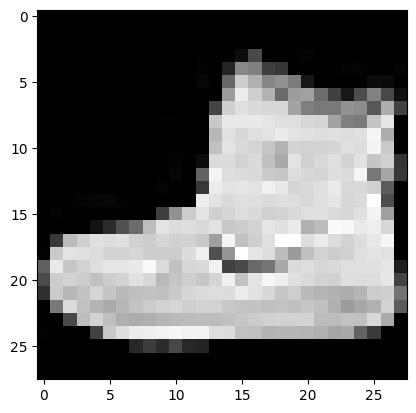

In [17]:
plt.imshow(image.squeeze(), cmap = 'gray')
print('label:', label)

In [18]:
batch = next(iter(train_loader))

In [19]:
len(batch)

2

In [20]:
type(batch)

list

In [21]:
images, labels = batch

In [22]:
images.shape

torch.Size([10, 1, 28, 28])

In [23]:
labels.shape

torch.Size([10])

利用torchvision一次性画出整批图像

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


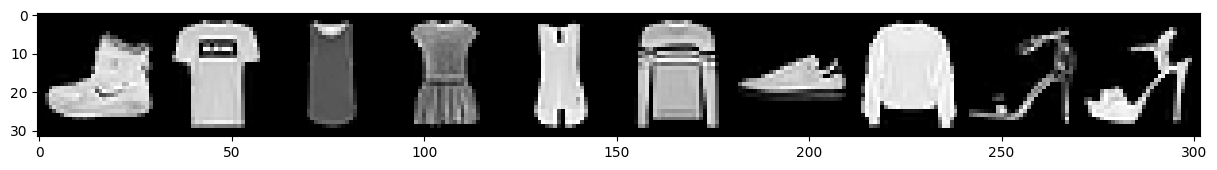

In [24]:
grid = torchvision.utils.make_grid(images, nrow=10)#创建一个网格，第一个参数为图像张量，nrow表示一行一共展示多少张图片

plt.figure(figsize = (15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print('labels:', labels)

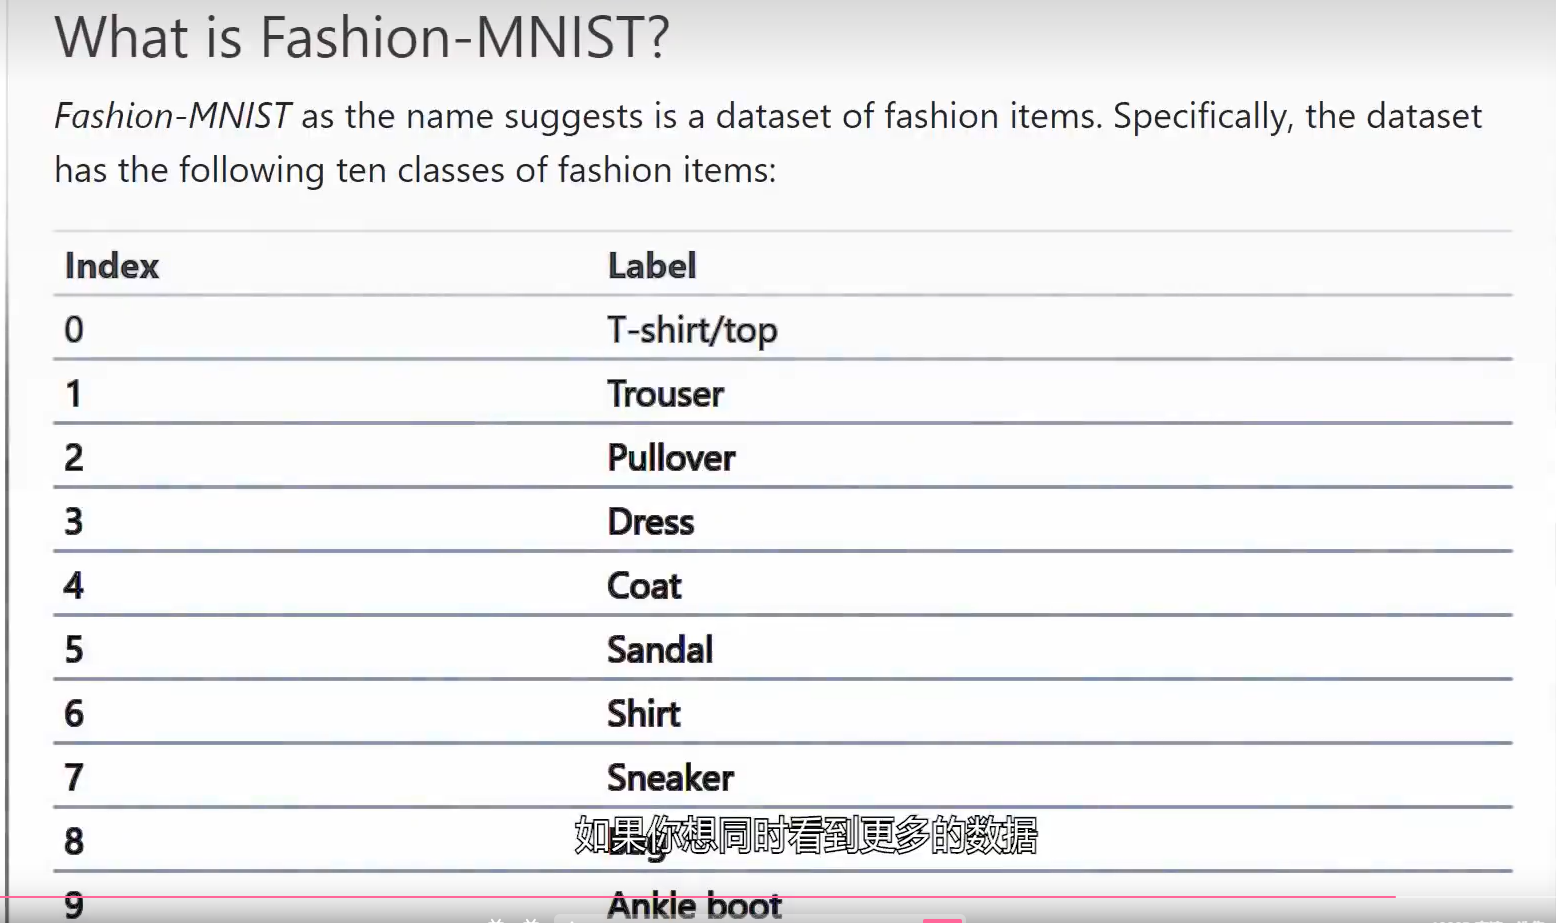

### 如果想要获得更多数据的图像，可以跟接下来这个试着增加数据加载器的批处理大小
- 与最开始对数据的处理一样，只是变batch_size为100

In [27]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)#一次迭代100次

In [28]:
batch = next(iter(train_loader))
images, labels = batch

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


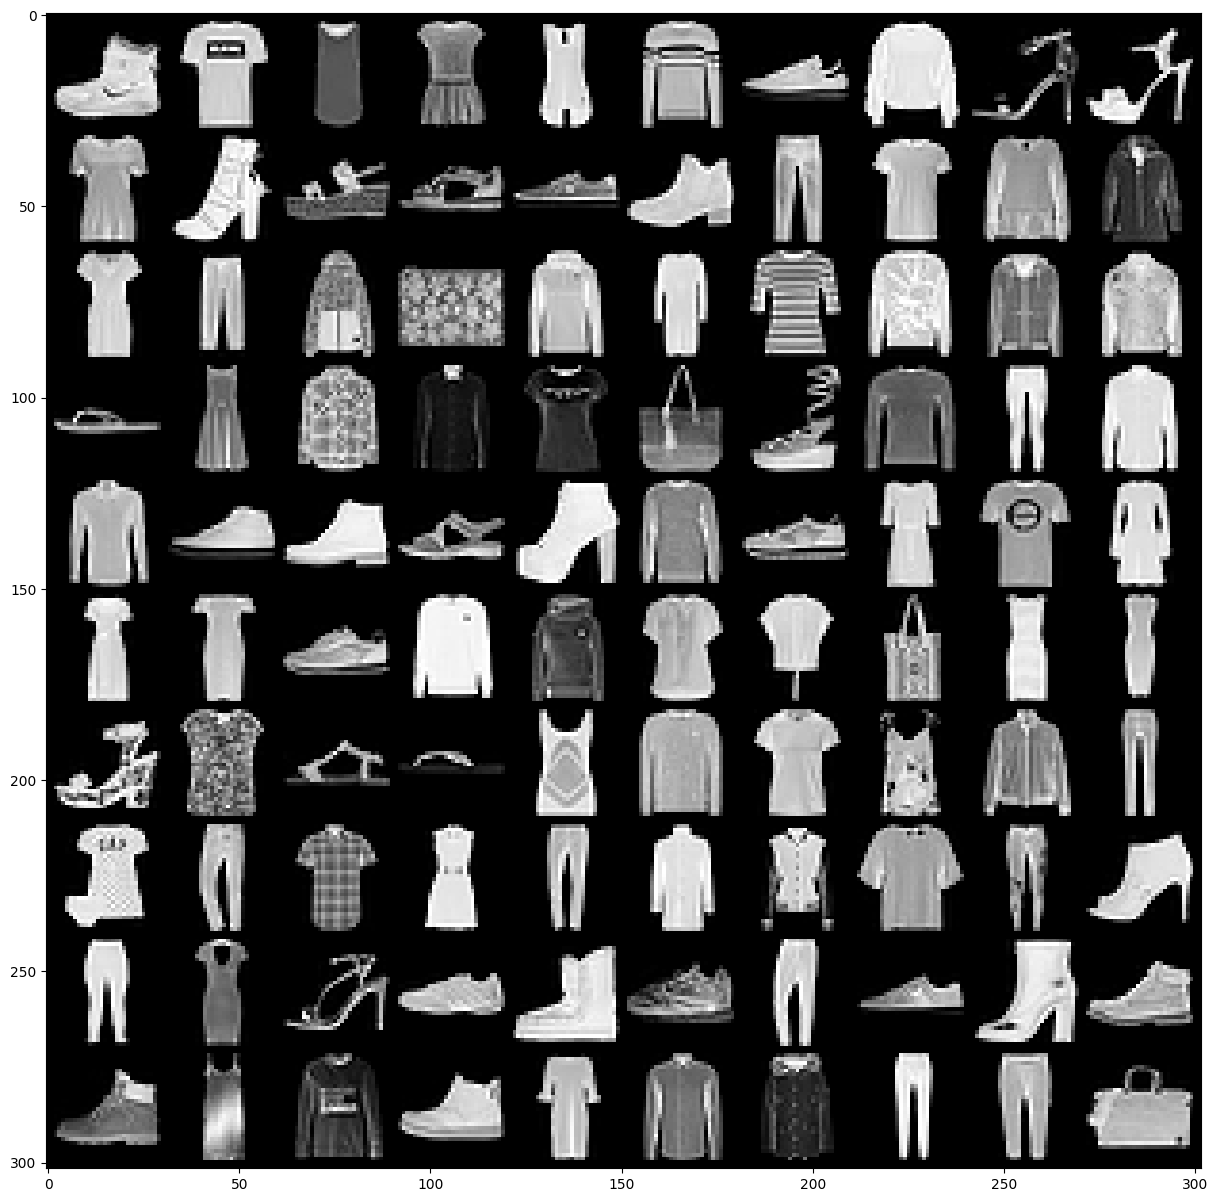

In [29]:
grid = torchvision.utils.make_grid(images, nrow=10)#创建一个网格，第一个参数为图像张量，nrow表示一行一共展示多少张图片

plt.figure(figsize = (15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))

print('labels:', labels)

### 定义神经网络

In [30]:
import torch.nn as nn
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):#init表示初始化，在对象的情况下1，属性是用值初始化的
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)#卷积层，分别指定输入输出大小，第三个参数为卷积大小1(5为5*5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        #线性层，全连接层
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)#最后一共10个特征
        
    def forward(self, t):
        #前向传播
        
        #输入层
        t = t
        
        #隐藏卷积层1
        t = self.conv1(t)#卷积
        t = F.relu(t)#激活函数relu
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)#池化，2*2最大池化，步长为2
        
        #隐藏卷积层2
        t = self.conv2(t)#卷积
        t = F.relu(t)#激活函数relu
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        #隐藏全连接层1
        t = t.reshape(-1, 12*4*4)#展平操作,并且接受输入
        t = self.fc1(t)
        t = F.relu(t)
        
        #隐藏全连接层2
        t = self.fc2(t)
        t = F.relu(t)
        
        #输出层
        t = self.out(t)
        #t = F.softmax(t, dim = 1)#多分类问题，下面的函数
        #之后的操作有内置softmax所以现在这一步不需要了
        
        return t

前向传播也可以这样写：但是上面的程序逻辑性更强
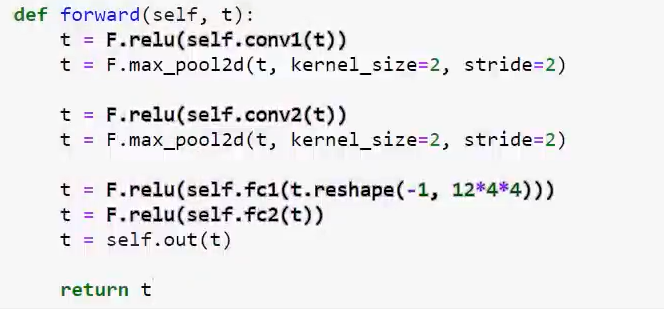  

卷积维度计算公式：  
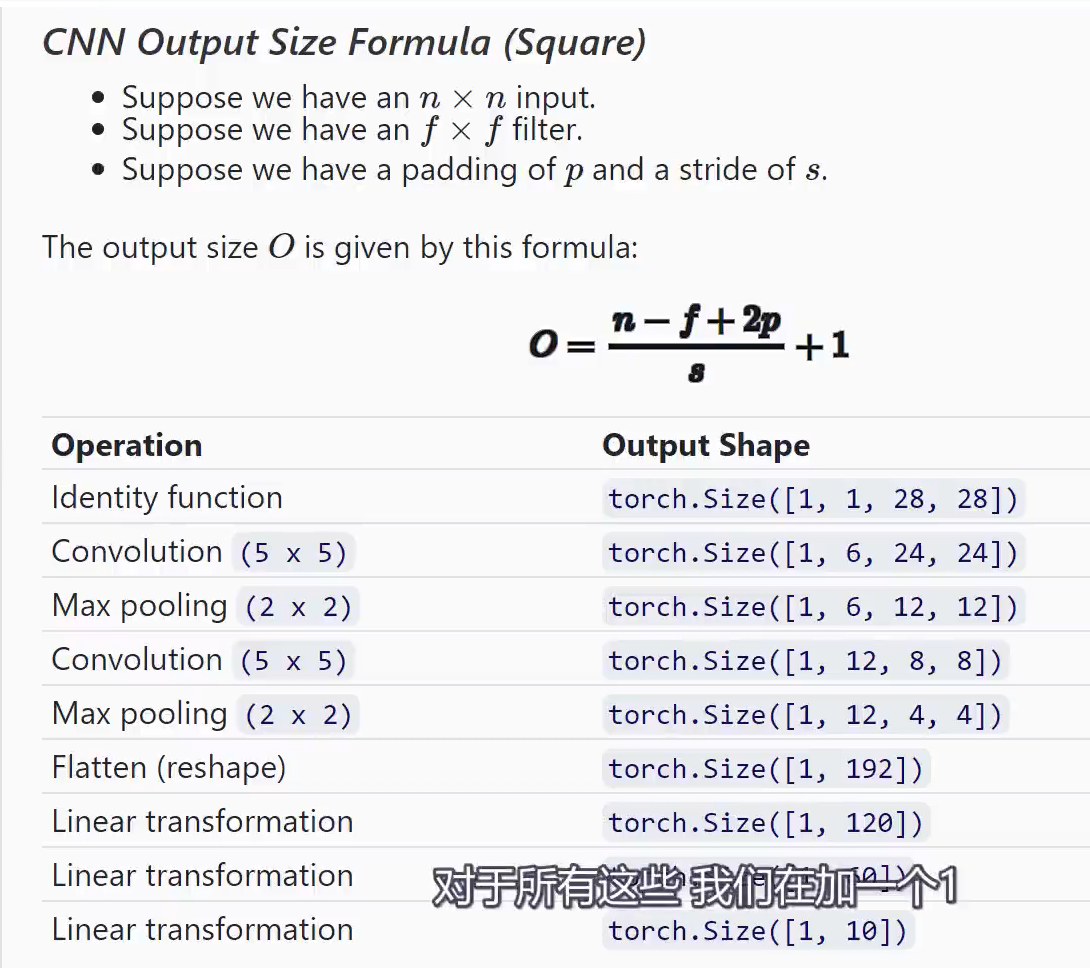

In [31]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


kernel_size为卷积核的大小，stride为步长

bias为偏差张量，可以理解为y=wx+b中的b

### 预测

In [32]:
pred = network(image.unsqueeze(0))#图像的大小需要时(batch_size * 通道数的三个特征)，所以需要用到unsqueeze增加一个维度

In [33]:
pred.shape

torch.Size([1, 10])

In [34]:
pred#输出的是属于各个类别的概率

tensor([[ 0.1107,  0.1019, -0.0633, -0.1147, -0.0619, -0.0497,  0.1167,  0.1397,  0.1149, -0.1155]],
       grad_fn=<AddmmBackward0>)

In [35]:
label

9

In [36]:
pred.argmax(dim = 1)

tensor([7])

In [37]:
F.softmax(pred, dim = 1)#使用内置softmax函数

tensor([[0.1092, 0.1082, 0.0917, 0.0871, 0.0919, 0.0930, 0.1098, 0.1124, 0.1096, 0.0871]], grad_fn=<SoftmaxBackward0>)

### 上面的程序没有进行训练，各个参数都是随机的

In [38]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10#一次迭代十张图片
)

In [39]:
batch = next(iter(data_loader))

In [40]:
images, labels = batch

In [41]:
images.shape

torch.Size([10, 1, 28, 28])

第一个参数：一批有10个图像（batch_size定义好的）  
这10个图像有一个单独的彩色通道，高度和宽度分别是28

In [42]:
labels.shape

torch.Size([10])

标签对应我们一批处理的10个图像，一共产生10个标签

In [43]:
preds = network(images)

In [44]:
preds.shape

torch.Size([10, 10])

In [45]:
preds

tensor([[ 0.1107,  0.1019, -0.0633, -0.1147, -0.0619, -0.0497,  0.1167,  0.1397,  0.1149, -0.1155],
        [ 0.1122,  0.1045, -0.0640, -0.1235, -0.0564, -0.0496,  0.1229,  0.1457,  0.1127, -0.1215],
        [ 0.1067,  0.1128, -0.0690, -0.1202, -0.0601, -0.0558,  0.1220,  0.1271,  0.1151, -0.1220],
        [ 0.1114,  0.1109, -0.0676, -0.1188, -0.0578, -0.0537,  0.1194,  0.1339,  0.1130, -0.1212],
        [ 0.1127,  0.1067, -0.0652, -0.1170, -0.0555, -0.0468,  0.1208,  0.1391,  0.1145, -0.1166],
        [ 0.1141,  0.1074, -0.0676, -0.1187, -0.0560, -0.0499,  0.1212,  0.1439,  0.1106, -0.1197],
        [ 0.1105,  0.1068, -0.0621, -0.1155, -0.0591, -0.0508,  0.1216,  0.1370,  0.1074, -0.1132],
        [ 0.1169,  0.1026, -0.0658, -0.1137, -0.0542, -0.0505,  0.1161,  0.1521,  0.1132, -0.1163],
        [ 0.1113,  0.1077, -0.0714, -0.1222, -0.0554, -0.0580,  0.1257,  0.1324,  0.1182, -0.1280],
        [ 0.1127,  0.1055, -0.0680, -0.1251, -0.0499, -0.0539,  0.1290,  0.1337,  0.1193, -0.1301]],

我们有10张图片，每张图片有10个预测类

In [46]:
preds.argmax(dim = 1)

tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [47]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

判断预测正确的个数

In [48]:
pred.argmax(dim = 1).eq(labels)

tensor([False, False, False, False, False, False,  True, False, False, False])

In [49]:
pred.argmax(dim = 1).eq(labels).sum()

tensor(1)

定义判断预测正确个数总和的函数

In [50]:
def get_num_correct(preds, labels):
    return preds.argmax(dim = 1).eq(labels).sum().item()

In [51]:
get_num_correct(preds, labels)

1

### 训练神经网络

In [52]:
import torch.optim as optim#优化器

torch.set_printoptions(linewidth=120)#指定如何输出
torch.set_grad_enabled(True)#开启梯度跟踪功能

In [53]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, labels = batch

#### 计算损失函数

In [54]:
network = Network()
preds = network(images)
loss = F.cross_entropy(preds, labels)#计算损失
loss.item()#调用item方法获得损失的数值

2.3130743503570557

#### 计算梯度

In [55]:
print(network.conv1.weight.grad)#检查第一个卷积层的梯度值

None


In [56]:
loss.backward()#反向传播计算梯度

In [57]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

#### 利用优化器更新权重参数

In [58]:
optimizer = optim.Adam(network.parameters(), lr = 0.01)

In [59]:
loss.item()

2.3130743503570557

In [60]:
get_num_correct(preds, labels)

4

In [61]:
optimizer.step()#使用优化器更新权重参数

In [62]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [63]:
loss.item()

2.3056440353393555

In [64]:
get_num_correct(preds, labels)

4

一次迭代结果就变得更好了

#### 将上面的代码块结合起来

In [65]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)#制定优化器

batch = next(iter(train_loader))#get batch
images, labels = batch

preds = network(images)#做一次预测
loss = F.cross_entropy(preds, labels)#计算损失

loss.backward()#计算梯度
optimizer.step()#更新权重参数


print('loss1:',loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.3130524158477783
loss2: 2.2828164100646973


### 进行循环迭代

#### 进行一次迭代

In [66]:
#将数据集中所有数据都进行迭代
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

#统计总的损失以及总的正确
total_loss = 0
total_correct = 0

for batch in train_loader:#get batch
    images, labels = batch
    
    preds = network(images)#传递patch
    loss = F.cross_entropy(preds, labels)#计算损失函数
    
    optimizer.zero_grad()#告诉优化器将梯度属性中权重的梯度归零，不加这一行梯度会累加
    loss.backward()#向后传播计算导数
    optimizer.step()#更新权重参数
    
    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)
    
print("epochs:", 0, "total_correct:", total_correct, "loss:", total_loss)
    

epochs: 0 total_correct: 46878 loss: 349.9310534000397


In [68]:
total_correct / len(train_set)#准确率

0.7813

#### 将多次迭代结合起来

In [69]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

for epoch in range(5):
    #统计总的损失以及总的正确
    total_loss = 0
    total_correct = 0

    for batch in train_loader:#get batch
        images, labels = batch

        preds = network(images)#传递patch
        loss = F.cross_entropy(preds, labels)#计算损失函数

        optimizer.zero_grad()#告诉优化器将梯度属性中权重的梯度归零，不加这一行梯度会累加
        loss.backward()#向后传播计算导数
        optimizer.step()#更新权重参数

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epochs:", epoch, "total_correct:", total_correct, "loss:", total_loss, 'accuracy:', total_correct / len(train_set))


epochs: 0 total_correct: 47487 loss: 334.66700184345245 accuracy: 0.79145
epochs: 1 total_correct: 51710 loss: 225.25220555067062 accuracy: 0.8618333333333333
epochs: 2 total_correct: 52327 loss: 205.38919141888618 accuracy: 0.8721166666666667
epochs: 3 total_correct: 52776 loss: 193.54243248701096 accuracy: 0.8796
epochs: 4 total_correct: 53038 loss: 187.7328941076994 accuracy: 0.8839666666666667


## 混淆矩阵评判预测结果

In [70]:
len(train_set)

60000

In [71]:
len(train_set.targets)

60000

### 获得训练集数据的预测

In [72]:
def get_all_preds(model, loader):#model:神经网络模型， loader：数据集
    all_preds = torch.tensor([])
    for batch in loader:#遍历整个数据集产生一个对于所有数据的预测
        images, labels = batch
        
        preds = model(images)
        
        all_preds = torch.cat(
            (all_preds, preds),
            dim = 0
        )
    return all_preds

In [73]:
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size = 10000)
train_preds = get_all_preds(network, prediction_loader)

混淆矩阵可以这样理解：对角线元素的值为对应标签网络预测正确的个数的总和
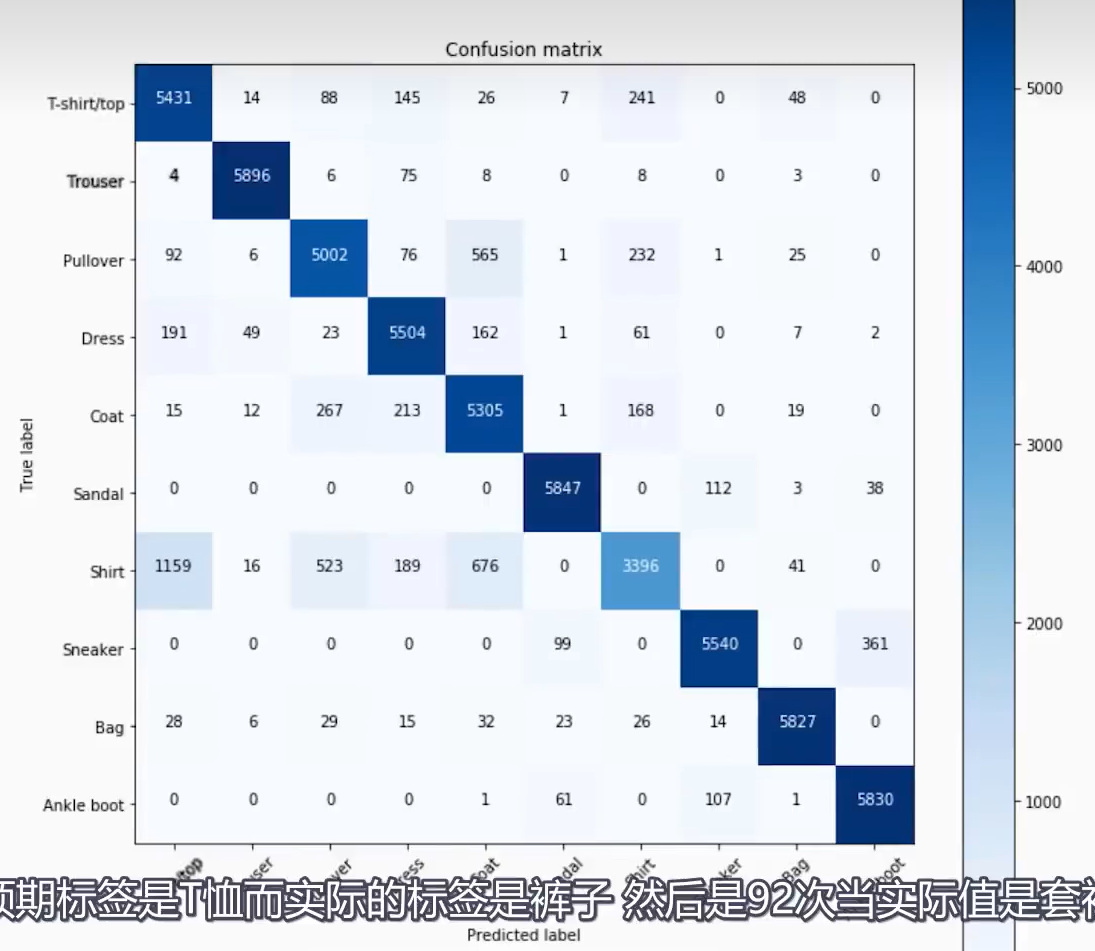

In [75]:
train_preds.shape#预测返回的是每个标签的概率值

torch.Size([60000, 10])

In [76]:
print(train_preds.requires_grad)

True


In [77]:
train_preds.grad

In [78]:
train_preds.grad_fn

In [79]:
with torch.no_grad():#我们需要在不跟踪梯度的情况下得到我们的预测，该代码作用为关闭局部梯度跟踪，做预测时需要关闭局部跟踪（开启局部跟踪可以理解为继续训练）
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

In [80]:
print(train_preds.requires_grad)

False


In [81]:
train_preds.grad

In [82]:
train_preds.grad_fn

In [83]:
preds_correct = get_num_correct(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 52470
accuracy: 0.8745


### 构建混淆矩阵

In [84]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [85]:
#制作预测张量,取概率最大的那个最为标签
train_preds.argmax(dim = 1)

tensor([9, 0, 0,  ..., 3, 0, 5])

In [86]:
stacked = torch.stack(
    (
        train_set.targets,
        train_preds.argmax(dim = 1)
    ),
    dim = 1
)

In [87]:
stacked.shape

torch.Size([60000, 2])

In [88]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

第一个值为真实标签，第二个值为预测标签(stack函数中定义的)

In [89]:
stacked[0].tolist()#相当于是真实值与预测的索引

[9, 9]

In [90]:
#构建混淆矩阵
cmt = torch.zeros(10, 10, dtype = torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [91]:
for p in stacked:
    j, k = p.tolist()
    cmt[j, k] = cmt[j, k] + 1

In [92]:
cmt

tensor([[5655,    6,   87,  102,   12,    4,   93,    0,   41,    0],
        [  32, 5857,    2,   94,    2,    0,   10,    0,    3,    0],
        [  96,    8, 4683,   49,  898,    4,  247,    0,   15,    0],
        [ 219,   61,   16, 5478,  149,    0,   71,    0,    4,    2],
        [  32,   11,  262,  269, 5105,    0,  284,    0,   33,    4],
        [   1,    0,    0,    2,    0, 5321,    0,  489,   21,  166],
        [1730,   12,  563,  115,  636,    0, 2884,    0,   59,    1],
        [   0,    0,    0,    0,    0,    5,    0, 5780,    9,  206],
        [  36,    2,   14,   21,   10,    9,   33,   10, 5860,    5],
        [   0,    0,    0,    0,    0,    4,    0,  147,    2, 5847]])

### 绘制混淆矩阵

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix#绘制混淆矩阵

#### 定义一个绘制混淆矩阵的函数

In [94]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion matrix',
                         cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [95]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim = 1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5655,    6,   87,  102,   12,    4,   93,    0,   41,    0],
       [  32, 5857,    2,   94,    2,    0,   10,    0,    3,    0],
       [  96,    8, 4683,   49,  898,    4,  247,    0,   15,    0],
       [ 219,   61,   16, 5478,  149,    0,   71,    0,    4,    2],
       [  32,   11,  262,  269, 5105,    0,  284,    0,   33,    4],
       [   1,    0,    0,    2,    0, 5321,    0,  489,   21,  166],
       [1730,   12,  563,  115,  636,    0, 2884,    0,   59,    1],
       [   0,    0,    0,    0,    0,    5,    0, 5780,    9,  206],
       [  36,    2,   14,   21,   10,    9,   33,   10, 5860,    5],
       [   0,    0,    0,    0,    0,    4,    0,  147,    2, 5847]],
      dtype=int64)

Confusion matrix, without normalization
[[5655    6   87  102   12    4   93    0   41    0]
 [  32 5857    2   94    2    0   10    0    3    0]
 [  96    8 4683   49  898    4  247    0   15    0]
 [ 219   61   16 5478  149    0   71    0    4    2]
 [  32   11  262  269 5105    0  284    0   33    4]
 [   1    0    0    2    0 5321    0  489   21  166]
 [1730   12  563  115  636    0 2884    0   59    1]
 [   0    0    0    0    0    5    0 5780    9  206]
 [  36    2   14   21   10    9   33   10 5860    5]
 [   0    0    0    0    0    4    0  147    2 5847]]


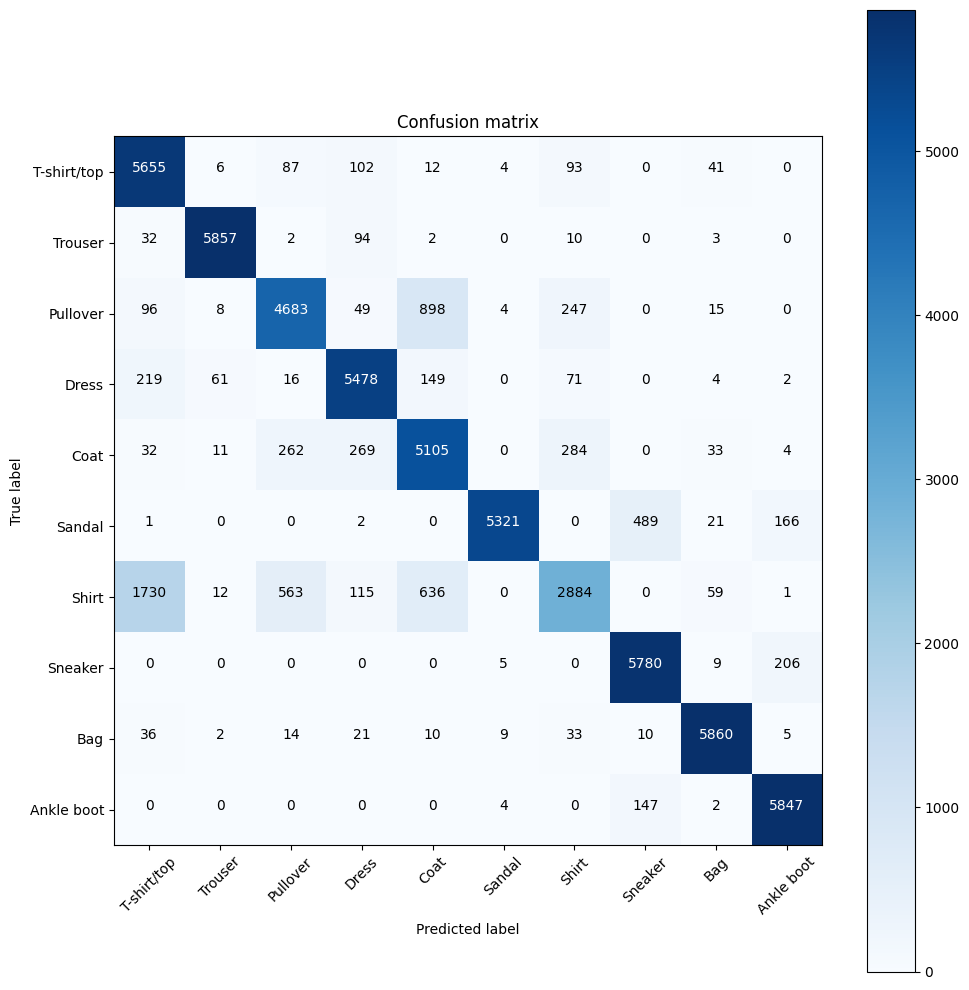

In [96]:
names = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cm, names)